### Training
Import the Python machine learning libraries

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json
import numpy as np
import math

### Import the following python sound libraries
- librosa : for extracting data from sound files (.wav files)
- pysynth and its variations : for generating sound files artificailly

#### Each pysynth variation generates sound coming from a particular

In [2]:
#Librosa
import librosa

#Pysynth and its variations.
import pysynth
import pysynth_b
import pysynth_e
import pysynth_s
import pysynth_c
import pysynth_d
import pysynth_p

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

### Functions for extracting features from a sound file
Note : The length of the feature vector used is 193

In [3]:
'''
Extracts features from a given sound array of amplitudes, sample rate
Arguments :
    X: np array of numbers denoting amplitudes
    sample_rate : sample rate
Output :
    Returns a np array, a feature vector of size 193 extracted from the input provided 
'''
def get_features(X,sample_rate):
    
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    return np.hstack((mfccs,chroma,mel,contrast,tonnetz))

'''
Extracts features from a given sound file
Arguments :
    file_name : name of the file
Output :
    Returns a np array, a feature vector of size 193 extracted from the input provided 
'''

def extract_feature(file_name):
    
    X, sample_rate = librosa.load(file_name)
    feats = get_features(X,sample_rate)
    return feats

### Creating the training data
- We create a metadata.json file in the data directory that stores metadata for all the sound files in the data directory
- This metadata is needed to create the training data which can be used by the machine learning libraries

In [4]:
with open('data/metadata.json') as json_file:  
    metadata = json.load(json_file)
notes = ['a0', 'a#0', 'b0', 'c1', 'c#1', 'd1', 'd#1', 'e1', 'f1', 'f#1', 'g1', 'g#1', 'a1', 'a#1', 'b1', 'c2', 'c#2', 'd2', 'd#2', 'e2', 'f2', 'f#2', 'g2', 'g#2', 'a2', 'a#2', 'b2', 'c3', 'c#3', 'd3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4', 'd4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', 'b4', 'c5', 'c#5', 'd5', 'd#5', 'e5', 'f5', 'f#5', 'g5', 'g#5', 'a5', 'a#5', 'b5', 'c6', 'c#6', 'd6', 'd#6', 'e6', 'f6', 'f#6', 'g6', 'g#6', 'a6', 'a#6', 'b6', 'c7', 'c#7', 'd7', 'd#7', 'e7', 'f7', 'f#7', 'g7', 'g#7', 'a7', 'a#7', 'b7', 'c8']

# Stores the note_number given the note
dic ={}
for i in range(len(notes)):
    dic[notes[i]]=i

# Stores the note given the note_number
dic2 = {}
for i in range(len(notes)):
    dic2[i]=notes[i]

    
'''
Creates training data
Arguments :
    metadata : a file storing the metadata of the sound files
    dic : stores the note_number given the note
Output :
    Returns a training data, training labels in the form X,Y 
'''

def create_training_data(metadata,dic):
    
    X = np.zeros((len(metadata['files']),193))
    Y = np.zeros((len(metadata['files'])))

    for i in range(len(metadata['files'])):

        file = 'data/'+metadata['files'][i]['name']

        data,fs = librosa.load(file)
        X[i,:] = get_features(data,fs)

        w=0
        while(w<len(data)-50):
            fl = 0
            for j in range(50):
                if(math.fabs(data[w+j])>5):
                    fl = 1
                    break
            if(fl==0):
                break
            w=w+1

        note = dic[metadata['files'][i]['notes'][0]]
        dur = metadata['files'][i]['dur']
        Y[i]=note
    
    return X,Y
    

In [5]:
# This block creates the training data
X,Y = create_training_data(metadata,dic)

### Training

In [6]:
from sklearn.utils import shuffle
print(X.shape,Y.shape)
Xtr, Xte, ytr, yte = train_test_split(X, Y, test_size = 0.2, random_state = 42)

(60, 193) (60,)


Multi Layer Perceptron Classifier

In [7]:
from sklearn.neural_network import MLPClassifier
mlc = MLPClassifier()

print("Training starts ...")
mlc.fit(Xtr,ytr)
print("Training has ended")

Training starts ...
Training has ended


c:\users\deban\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
# Training Score
print("Train score : {0}".format(mlc.score(Xtr,ytr)))

#Testing Score
print("Test Score : {0}".format(mlc.score(Xte,yte)))

Train score : 1.0
Test Score : 0.75


Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

print("Training starts ...")
rfc.fit(Xtr,ytr)
print("Training has ended")

Training starts ...
Training has ended


c:\users\deban\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
# Training Score
print("Train score : {0}".format(mlc.score(Xtr,ytr)))

#Testing Score
print("Test Score : {0}".format(mlc.score(Xte,yte)))

Train score : 1.0
Test Score : 0.75


### Saving the trained model
Here I am saving the Multi Layer Perceptron model

In [11]:
import pickle

filename = 'note_classifier.sav'
pickle.dump(mlc, open(filename, 'wb'))

### Using the model to convert sound form one istrument to another

In [12]:
mlc = pickle.load(open('note_classifier.sav', 'rb'))

In [13]:
def convert(soundfile,newname,instrument='e'):
    
    
    # Load the sound file
    arr , fs = librosa.load(soundfile)
    
    
    # Detect onsets
    onset = np.array([0]+list(librosa.onset.onset_detect(y = arr, sr = fs, units = 'samples')))
    print(onset)
    print(len(onset))
    print(fs)
    
    plt.figure(figsize=(15,3))
    plt.title(soundfile+' waveform')
    plt.plot(list(range(len(arr))),arr)
    plt.vlines(onset,-1,1)
    plt.show()
    
    
    # Note and Duration prediction using model
    pred = []
    for i in range(len(onset)-1):
        t = arr[onset[i]:onset[i+1]]
        if(len(t)>2500):
            temp = get_features(t,fs)
            pred_note = dic2[mlc.predict([temp])[0]]
            pred_dur = 44100 / len(t)
            pred.append((pred_note,pred_dur))

    pred = tuple(pred)
    print('Predicted Notes and Durations')
    print(pred)
    
    
    # Creating the new sound file
    if(instrument=='a'):
        pysynth.make_wav(pred,fn=str(newname)+'.wav')
    elif(instrument=='b'):
        pysynth_b.make_wav(pred,fn=str(newname)+'.wav') 
    elif(instrument=='e'):
        pysynth_e.make_wav(pred,fn=str(newname)+'.wav')
    elif(instrument=='s'):
        pysynth_s.make_wav(pred,fn=str(newname)+'.wav')
    elif(instrument=='c'):
        pysynth_c.make_wav(pred,fn=str(newname)+'.wav')
    elif(instrument=='d'):
        pysynth_d.make_wav(pred,fn=str(newname)+'.wav')
    elif(instrument=='p'):
        pysynth_p.make_wav(pred,fn=str(newname)+'.wav')

###  Convert a file
- The first file name is the name of the sound file we want to convert
- The second file name is the name of the  new sound file produced
- The third argument is the output instrument. Available instruments are a,b,e,s,c,d,p

[     0   1536  11776  16896  22016  27136  31744  41984  52224  62464
  72704  77824  82944  88064  93184 103424 113152 123392 133632 138752
 143872 148992 154112 164352 169472 174592 179712 184832 194560 199680
 204800 209920 215040 225280 230400 235520 240640 245760 256000 261120
 266240 271360 275968 286208 296448 306688 316928 322048 327168 332288
 337408 347648 357376 367616 377856 382976 388096 393216 398336 408576
 413696 418816 423936 429056 439296 443904 449024 454144 459264]
69
22050


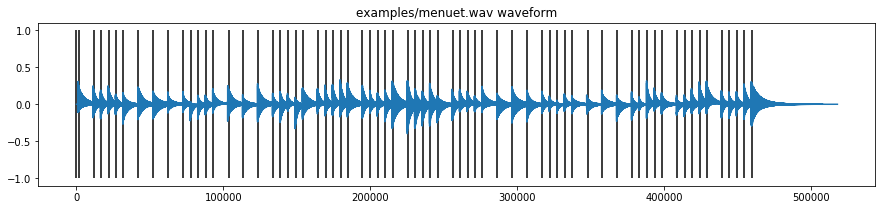

Predicted Notes and Durations
(('d5', 4.306640625), ('d#3', 8.61328125), ('d#3', 8.61328125), ('b4', 8.61328125), ('d#3', 9.5703125), ('d5', 4.306640625), ('d#3', 4.306640625), ('d#3', 4.306640625), ('d#3', 4.306640625), ('d#3', 8.61328125), ('d#3', 8.61328125), ('d#3', 8.61328125), ('g6', 8.61328125), ('g6', 4.306640625), ('d#3', 4.533305921052632), ('d#3', 4.306640625), ('d#3', 4.306640625), ('d5', 8.61328125), ('d#3', 8.61328125), ('b4', 8.61328125), ('b4', 8.61328125), ('b4', 4.306640625), ('d#3', 8.61328125), ('b4', 8.61328125), ('d#1', 8.61328125), ('d#3', 8.61328125), ('g6', 4.533305921052632), ('d#3', 8.61328125), ('g6', 8.61328125), ('b4', 8.61328125), ('d#3', 8.61328125), ('d#1', 4.306640625), ('d#3', 8.61328125), ('b3', 8.61328125), ('d#1', 8.61328125), ('d#3', 8.61328125), ('d5', 4.306640625), ('d#3', 8.61328125), ('d#3', 8.61328125), ('b4', 8.61328125), ('b4', 9.5703125), ('d5', 4.306640625), ('d#3', 4.306640625), ('d#3', 4.306640625), ('d#3', 4.306640625), ('d#3', 8.61328

In [14]:
convert('examples/menuet.wav','examples/menuet_out','e')